## 前情函数介绍

在 data 文件夹下，新建一个 xls 文件，内容如下
<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>int</th>
      <th>char</th>
      <th>float</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>1</td>
      <td>NaN</td>
      <td>1.1</td>
    </tr>
    <tr>
      <th>1</th>
      <td>2</td>
      <td>NaN</td>
      <td>2.2</td>
    </tr>
    <tr>
      <th>2</th>
      <td>3</td>
      <td>NaN</td>
      <td>3.3</td>
    </tr>
    <tr>
      <th>3</th>
      <td>4</td>
      <td>d</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>4</th>
      <td>5</td>
      <td>e</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>5</th>
      <td>6</td>
      <td>NaN</td>
      <td>6.6</td>
    </tr>
    <tr>
      <th>6</th>
      <td>7</td>
      <td>NaN</td>
      <td>7.7</td>
    </tr>
  </tbody>
</table>
</div>

In [1]:
import pandas as pd


demo_data = pd.read_excel('./data/demo.xls')

In [2]:
demo_data

,int,char,float
0,1,NaN,1.1
1,2,NaN,2.2
2,3,NaN,3.3
3,4,d,NaN
4,5,e,NaN
5,6,NaN,6.6
6,7,NaN,7.7


### Pandas 缺失值判断函数 isnull()、isnull().any()、isnull().sum()
isnull() 返回一个 bool 值的 dataframe  
isnull().any() 判断特征列是否存在空值
isnull().sum() 获取特征列空值数目

In [3]:
demo_data.isnull()

,int,char,float
0,False,True,False
1,False,True,False
2,False,True,False
3,False,False,True
4,False,False,True
5,False,True,False
6,False,True,False


In [4]:
demo_data.isnull().any()

int      False
char      True
float     True
dtype: bool

In [5]:
demo_data.isnull().sum()

int      0
char     5
float    2
dtype: int64

### Pandas 缺失值填充函数 fillna()

In [6]:
demo_data['char'] = demo_data['char'].fillna('A')
demo_data['float'] = demo_data['float'].fillna('5.5')

In [7]:
demo_data

,int,char,float
0,1,A,1.1
1,2,A,2.2
2,3,A,3.3
3,4,d,5.5
4,5,e,5.5
5,6,A,6.6
6,7,A,7.7


### Pandas map() 映射函数  
map 里面放入字典参数，将对应的键🗡替换成其值，注意 map 需要将所有值全部替换，否则会报错

In [8]:
try:
    demo_data['char'] = demo_data['char'].map({'A': 0, 'd': 1}).astype(int)
except ValueError:
    print('Error rising:Cannot convert non-finite values (NA or inf) to integer')
finally:
    demo_data['char'] = demo_data['char'].map({'A': 0, 'd': 1, 'e': 2}).astype(int)
    print('Mapping finished')

Error rising:Cannot convert non-finite values (NA or inf) to integer
Mapping finished


In [9]:
demo_data

,int,char,float
0,1,0,1.1
1,2,0,2.2
2,3,0,3.3
3,4,1,5.5
4,5,2,5.5
5,6,0,6.6
6,7,0,7.7


### Pandas sample() 数据洗牌
sample 用于在原数据中提取数据，并进行洗牌操作，frac 代表提取的比例，为 1 表示 $100％$

In [10]:
shuffle_data_1 = demo_data.sample(frac = 1)

In [11]:
shuffle_data_1

,int,char,float
1,2,0,2.2
0,1,0,1.1
2,3,0,3.3
3,4,1,5.5
5,6,0,6.6
4,5,2,5.5
6,7,0,7.7


In [12]:
shuffle_data_2 = demo_data.sample(frac = 5 / 7)

In [13]:
shuffle_data_2

,int,char,float
6,7,0,7.7
0,1,0,1.1
2,3,0,3.3
5,6,0,6.6
1,2,0,2.2


### Pandas drop() 删除数据
drop() 不改变原有数据，返回另一个 dataframe，使用 axis 可以指定行、列

In [14]:
demo_data = demo_data.drop(['char'], axis=1)

In [15]:
demo_data

,int,float
0,1,1.1
1,2,2.2
2,3,3.3
3,4,5.5
4,5,5.5
5,6,6.6
6,7,7.7


### Pandas values 转换为 ndarray  
经过上面处理，demo_data 中 data_frame 全部变成数字，使用 .values 将 data_frame 转换为 ndarray

In [16]:
nd_array = demo_data.values

In [17]:
print('nd_array:\n', nd_array,
      '\nnd_array type:', type(nd_array))

nd_array:
 [[1 1.1]
 [2 2.2]
 [3 3.3]
 [4 '5.5']
 [5 '5.5']
 [6 6.6]
 [7 7.7]] 
nd_array type: <class 'numpy.ndarray'>


## 正式开始

### 导入必要包

In [18]:
import numpy
import pandas as pd
import tensorflow as tf
import urllib.request
from sklearn import preprocessing
import matplotlib.pyplot as plt
import os
import datetime


tf.__version__

'2.0.0'

### 数据下载

In [19]:
data_url = 'http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls'

data_file = './data/titanic3.xls'

if not os.path.exists(data_file):
    operation = urllib.request.urlretrieve(data_url, data_file)
    print('downloading from %s' % data_url)
else:
    print('titanic3.xls is exists in the data directory')

titanic3.xls is exists in the data directory


### 读取数据
从数据摘要中发现 count 行的每一列数据不等，说明数据具有缺失项

In [20]:
dataframe = pd.read_excel(data_file)
dataframe.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [21]:
dataframe

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


### 数据预处理
去掉了 ticked、cabin，将 age、fare，空值用其列均值代替，sex 用0，1代替，embarked 用 S 代替，在将其所在字符值转为数字  
**注意：你应使用 .copy() 函数来防止严重警告⚠**  
`selected_dataframe = dataframe[selected_cols].copy()` ok  
`selected_dataframe = dataframe[selected_cols]`      not recommand

In [22]:
selected_cols = ['survived', 'name', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
selected_dataframe = dataframe[selected_cols].copy()

#### 空值填充

In [23]:
age_mean_value = selected_dataframe['age'].mean()
selected_dataframe['age'] = selected_dataframe['age'].fillna(age_mean_value)

fare_mean_value = selected_dataframe['fare'].mean()
selected_dataframe['fare'] = selected_dataframe['fare'].fillna(fare_mean_value)

selected_dataframe['embarked'] = selected_dataframe['embarked'].fillna('S')

In [24]:
selected_dataframe.describe()

,survived,pclass,age,sibsp,parch,fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,0.381971,2.294882,29.881135,0.498854,0.385027,33.295479
std,0.486055,0.837836,12.883199,1.041658,0.865560,51.738879
min,0.000000,1.000000,0.166700,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.881135,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


#### 数字映射

In [25]:
selected_dataframe['sex'] = selected_dataframe['sex'].map({'female': 0, 'male': 1}).astype(int)
selected_dataframe['embarked'] = selected_dataframe['embarked'].map({'C': 0, 'Q': 1, 'S': 2}).astype(int)

### 创建训练数据集与标签

删除 name 列

In [26]:
selected_dataframe = selected_dataframe.drop(['name'], axis=1)

In [27]:
selected_dataframe[:3]

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,1,1,0,29.0000,0,0,211.3375,2
1,1,1,1,0.9167,1,2,151.5500,2
2,0,1,0,2.0000,1,2,151.5500,2


features 代表特征，第 1 到最后一列
label 代表标签，第 0 列

In [28]:
ndarray_data = selected_dataframe.values
features = ndarray_data[:, 1:]
label = ndarray_data[:, 0]

In [29]:
print('features:\n', features,
      '\nlabel:', label)

features:
 [[  1.       0.      29.     ...   0.     211.3375   2.    ]
 [  1.       1.       0.9167 ...   2.     151.55     2.    ]
 [  1.       0.       2.     ...   2.     151.55     2.    ]
 ...
 [  3.       1.      26.5    ...   0.       7.225    0.    ]
 [  3.       1.      27.     ...   0.       7.225    0.    ]
 [  3.       1.      29.     ...   0.       7.875    2.    ]] 
label: [1. 1. 0. ... 0. 0. 0.]


### 数据标准化

In [30]:
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
norm_features = minmax_scale.fit_transform(features)

In [31]:
print('norm_features:\n', norm_features,
      '\nlabel:', label)

norm_features:
 [[0.         0.         0.36116884 ... 0.         0.41250333 1.        ]
 [0.         1.         0.00939458 ... 0.22222222 0.2958059  1.        ]
 [0.         0.         0.0229641  ... 0.22222222 0.2958059  1.        ]
 ...
 [1.         1.         0.32985358 ... 0.         0.01410226 0.        ]
 [1.         1.         0.33611663 ... 0.         0.01410226 0.        ]
 [1.         1.         0.36116884 ... 0.         0.01537098 1.        ]] 
label: [1. 1. 0. ... 0. 0. 0.]


## 代码重构定义数据预处理函数

In [32]:
def prepare_data(df_data):
    df = df_data.drop(['name'], axis=1)
    age_mean = df['age'].mean()
    df['age'] = df['age'].fillna(age_mean)
    fare_mean = df['fare'].mean()
    df['fare'] = df['fare'].fillna(fare_mean)
    df['sex'] = df['sex'].map({'female':0, 'male':1}).astype(int)
    df['embarked'] = df['embarked'].fillna('S')
    df['embarked'] = df['embarked'].map({'C':0, 'Q':1, 'S':2}).astype(int)

    ndarray_data = df.values

    features = ndarray_data[:, 1:]
    label = ndarray_data[:, 0]

    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    norm_features = minmax_scale.fit_transform(features)

    return norm_features, label

### 数据读取并洗牌

In [33]:
dataframe = pd.read_excel('./data/titanic3.xls')
selected_cols= ['survived', 'name', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
selected_dataframe = dataframe[selected_cols].copy()
selected_dataframe = selected_dataframe.sample(frac=1)

In [34]:
x_data, y_data = prepare_data(selected_dataframe)

In [35]:
train_size = int(len(x_data) * 0.8)

x_train = x_data[:train_size]
y_train = y_data[:train_size]

x_test = x_data[train_size:]
y_test = y_data[train_size:]

In [36]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=64,
                          input_dim=7,
                          use_bias=True,
                          kernel_initializer='uniform',
                          bias_initializer='zeros',
                          activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(units=32, activation='sigmoid'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                512       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,625
Trainable params: 2,625
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.003),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [39]:
train_history = model.fit(
                    x=x_train,
                    y=y_train,
                    validation_split=0.2,
                    epochs=100,
                    batch_size=40,
                    verbose=1)

Train on 837 samples, validate on 210 samples
Epoch 1/100
837/837 [==============================] - 2s 2ms/sample - loss: 0.6968 - accuracy: 0.5412 - val_loss: 0.5988 - val_accuracy: 0.6571
Epoch 2/100
837/837 [==============================] - 0s 147us/sample - loss: 0.6342 - accuracy: 0.6404 - val_loss: 0.5504 - val_accuracy: 0.7571
Epoch 3/100
837/837 [==============================] - 0s 153us/sample - loss: 0.5555 - accuracy: 0.7276 - val_loss: 0.4904 - val_accuracy: 0.8143
Epoch 4/100
837/837 [==============================] - 0s 148us/sample - loss: 0.5088 - accuracy: 0.7766 - val_loss: 0.4638 - val_accuracy: 0.8095
Epoch 5/100
837/837 [==============================] - 0s 137us/sample - loss: 0.4948 - accuracy: 0.7814 - val_loss: 0.4526 - val_accuracy: 0.8095
Epoch 6/100
837/837 [==============================] - 0s 124us/sample - loss: 0.4832 - accuracy: 0.7897 - val_loss: 0.4526 - val_accuracy: 0.8000
Epoch 7/100
837/837 [==============================] - 0s 140us/sample - l

### 训练可视化

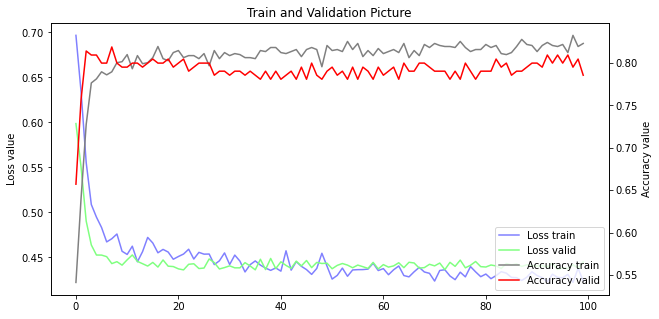

In [40]:
fig = plt.gcf()
fig.set_size_inches(10, 5)
ax1 = fig.add_subplot(111)
ax1.set_title('Train and Validation Picture')
ax1.set_ylabel('Loss value')
line1, = ax1.plot(train_history.history['loss'], color=(0.5, 0.5, 1.0), label='Loss train')
line2, = ax1.plot(train_history.history['val_loss'], color=(0.5, 1.0, 0.5), label='Loss valid')
ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy value')
line3, = ax2.plot(train_history.history['accuracy'], color=(0.5, 0.5, 0.5), label='Accuracy train')
line4, = ax2.plot(train_history.history['val_accuracy'], color=(1, 0, 0), label='Accuracy valid')
plt.legend(handles=(line1, line2, line3, line4), loc='best')
plt.show()

### 测试模型

In [41]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('test_loss:', test_loss,
      '\ntest_acc:', test_acc,
      '\nmetrics_names:', model.metrics_names)

262/1 - 0s - loss: 0.3581 - accuracy: 0.7672
test_loss: 0.48995060536242624 
test_acc: 0.76717556 
metrics_names: ['loss', 'accuracy']


### 使用 Jack & Rose 测试

In [42]:
Jack_info = [0, 'Jack', 3, 'male', 23, 1, 0, 5.0000, 'S']
Rose_info = [1, 'Rose', 1, 'female', 20, 1, 0, 100.0000, 'S']

In [43]:
new_passenger_pd = pd.DataFrame([Jack_info, Rose_info], columns=selected_cols)
all_passenger_pd = selected_dataframe.append(new_passenger_pd)

In [44]:
pred = model.predict(prepare_data(all_passenger_pd)[0])

In [45]:
print('Rose survived probability:', pred[-1:][0][0],
      '\nJack survived probability:', pred[-2:][0][0])

Rose survived probability: 0.96711206 
Jack survived probability: 0.12514974


### 数据插入最后一列生存概率

In [46]:
all_passenger_pd.insert(len(all_passenger_pd.columns), 'surv_prob', pred)

In [47]:
all_passenger_pd

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,surv_prob
75,0,"Colley, Mr. Edward Pomeroy",1,male,47.0,0,0,25.5875,S,0.221973
321,0,"Wright, Mr. George",1,male,62.0,0,0,26.5500,S,0.194789
712,0,"Celotti, Mr. Francesco",3,male,24.0,0,0,8.0500,S,0.130646
345,0,"Berriman, Mr. William John",2,male,23.0,0,0,13.0000,S,0.211936
1298,0,"Wittevrongel, Mr. Camille",3,male,36.0,0,0,9.5000,S,0.106074
...,...,...,...,...,...,...,...,...,...,...
10,0,"Astor, Col. John Jacob",1,male,47.0,1,0,227.5250,C,0.213140
434,1,"Hart, Miss. Eva Miriam",2,female,7.0,0,2,26.2500,S,0.881991
690,0,"Brobeck, Mr. Karl Rudolf",3,male,22.0,0,0,7.7958,S,0.136104
0,0,Jack,3,male,23.0,1,0,5.0000,S,0.125150


In [48]:
form =pd.DataFrame(columns=[column for column in all_passenger_pd], data=all_passenger_pd)
form.to_excel('./data/result.xls', encoding='utf-8', index=None, header=True)

## 加入回调

In [49]:
def prepare_data(df_data):
    df = df_data.drop(['name'], axis=1)
    age_mean = df['age'].mean()
    df['age'] = df['age'].fillna(age_mean)
    fare_mean = df['fare'].mean()
    df['fare'] = df['fare'].fillna(fare_mean)
    df['sex'] = df['sex'].map({'female':0, 'male':1}).astype(int)
    df['embarked'] = df['embarked'].fillna('S')
    df['embarked'] = df['embarked'].map({'C':0, 'Q':1, 'S':2}).astype(int)

    ndarray_data = df.values

    features = ndarray_data[:, 1:]
    label = ndarray_data[:, 0]

    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    norm_features = minmax_scale.fit_transform(features)

    return norm_features, label

In [50]:
dataframe = pd.read_excel('./data/titanic3.xls')
selected_cols= ['survived', 'name', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
selected_dataframe = dataframe[selected_cols].copy()
selected_dataframe = selected_dataframe.sample(frac=1)

x_data, y_data = prepare_data(selected_dataframe)

train_size = int(len(x_data) * 0.8)

x_train = x_data[:train_size]
y_train = y_data[:train_size]

x_test = x_data[train_size:]
y_test = y_data[train_size:]

In [51]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=256,
                          input_dim=7,
                          use_bias=True,
                          kernel_initializer='uniform',
                          bias_initializer='zeros',
                          activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(units=128, activation='sigmoid'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(units=64, activation='sigmoid'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(units=32, activation='sigmoid'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               2048      
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)               

In [53]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.003),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [54]:
log_dir = os.path.join(
    'logs2.x',
    'train',
    'plugins',
    'profile',
    datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S'))

checkpoint_path = './checkpoint2.x/Titanic.{epoch:02d}.ckpt'
if not os.path.exists('./checkpoint2.x'):
    os.mkdir('./checkpoint2.x')

callbacks = [tf.keras.callbacks.TensorBoard(log_dir=log_dir,
                         histogram_freq=2),
       tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                         save_weights_only=True,
                         verbose=1,
                         period=5)]

In [55]:
train_history = model.fit(x=x_train, y=y_train,
                          validation_split=0.2,
                          epochs=100,
                          batch_size=40,
                          callbacks=callbacks,
                          verbose=1)

Train on 837 samples, validate on 210 samples
Epoch 1/100
837/837 [==============================] - 2s 2ms/sample - loss: 0.6933 - accuracy: 0.5806 - val_loss: 0.6643 - val_accuracy: 0.6048
Epoch 2/100
837/837 [==============================] - 0s 256us/sample - loss: 0.6708 - accuracy: 0.6129 - val_loss: 0.6268 - val_accuracy: 0.6048
Epoch 3/100
837/837 [==============================] - 0s 345us/sample - loss: 0.5863 - accuracy: 0.7157 - val_loss: 0.5519 - val_accuracy: 0.7476
Epoch 4/100
837/837 [==============================] - 0s 232us/sample - loss: 0.5316 - accuracy: 0.7670 - val_loss: 0.5251 - val_accuracy: 0.7571
Epoch 5/100
720/837 [========================>.....] - ETA: 0s - loss: 0.5042 - accuracy: 0.7806
Epoch 00005: saving model to ./checkpoint2.x/Titanic.05.h5
837/837 [==============================] - 1s 603us/sample - loss: 0.5091 - accuracy: 0.7802 - val_loss: 0.5310 - val_accuracy: 0.7524
Epoch 6/100
837/837 [==============================] - 0s 232us/sample - loss

Epoch 91/100
837/837 [==============================] - 0s 299us/sample - loss: 0.4365 - accuracy: 0.8053 - val_loss: 0.4658 - val_accuracy: 0.7905
Epoch 92/100
837/837 [==============================] - 0s 319us/sample - loss: 0.4376 - accuracy: 0.8148 - val_loss: 0.4696 - val_accuracy: 0.7905
Epoch 93/100
837/837 [==============================] - 0s 355us/sample - loss: 0.4375 - accuracy: 0.8005 - val_loss: 0.4698 - val_accuracy: 0.7952
Epoch 94/100
837/837 [==============================] - 0s 205us/sample - loss: 0.4384 - accuracy: 0.8005 - val_loss: 0.4682 - val_accuracy: 0.7905
Epoch 95/100
440/837 [==============>...............] - ETA: 0s - loss: 0.4514 - accuracy: 0.7909
Epoch 00095: saving model to ./checkpoint2.x/Titanic.95.h5
837/837 [==============================] - 0s 344us/sample - loss: 0.4392 - accuracy: 0.8005 - val_loss: 0.4620 - val_accuracy: 0.7952
Epoch 96/100
837/837 [==============================] - 0s 219us/sample - loss: 0.4347 - accuracy: 0.8053 - val_loss

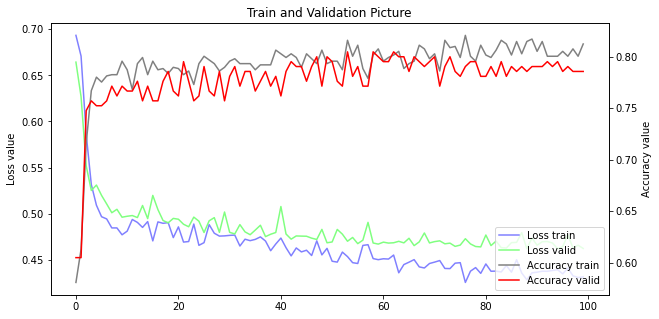

In [56]:
fig = plt.gcf()
fig.set_size_inches(10, 5)
ax1 = fig.add_subplot(111)
ax1.set_title('Train and Validation Picture')
ax1.set_ylabel('Loss value')
line1, = ax1.plot(train_history.history['loss'], color=(0.5, 0.5, 1.0), label='Loss train')
line2, = ax1.plot(train_history.history['val_loss'], color=(0.5, 1.0, 0.5), label='Loss valid')
ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy value')
line3, = ax2.plot(train_history.history['accuracy'], color=(0.5, 0.5, 0.5), label='Accuracy train')
line4, = ax2.plot(train_history.history['val_accuracy'], color=(1, 0, 0), label='Accuracy valid')
plt.legend(handles=(line1, line2, line3, line4), loc='best')
plt.show()

In [57]:
Jack_info = [0, 'Jack', 3, 'male', 23, 1, 0, 5.0000, 'S']
Rose_info = [1, 'Rose', 1, 'female', 20, 1, 0, 100.0000, 'S']

new_passenger_pd = pd.DataFrame([Jack_info, Rose_info], columns=selected_cols)
all_passenger_pd = selected_dataframe.append(new_passenger_pd)

pred = model.predict(prepare_data(all_passenger_pd)[0])

print('Rose survived probability:', pred[-1:][0][0],
      '\nJack survived probability:', pred[-2:][0][0])

Rose survived probability: 0.9700622 
Jack survived probability: 0.12726058


### 加载模型
由于只保存了网络参数，没有保存网络结构，需要重新定义网络结构（当然，由于 jupyter 的缓存效应，你大可不必重新定义，对于独立的 py 文件则需要这么做）

In [58]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=256,
                          input_dim=7,
                          use_bias=True,
                          kernel_initializer='uniform',
                          bias_initializer='zeros',
                          activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(units=128, activation='sigmoid'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(units=64, activation='sigmoid'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(units=32, activation='sigmoid'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [59]:
model.load_weights('./checkpoint2.x/Titanic.100.h5')

In [60]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.003),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [61]:
loss, acc = model.evaluate(x_test, y_test, verbose=2)
print('Restore model accuracy:{:5.4f}%'.format(100 * acc))

262/1 - 0s - loss: 0.5042 - accuracy: 0.8511
Restore model accuracy:85.1145%
